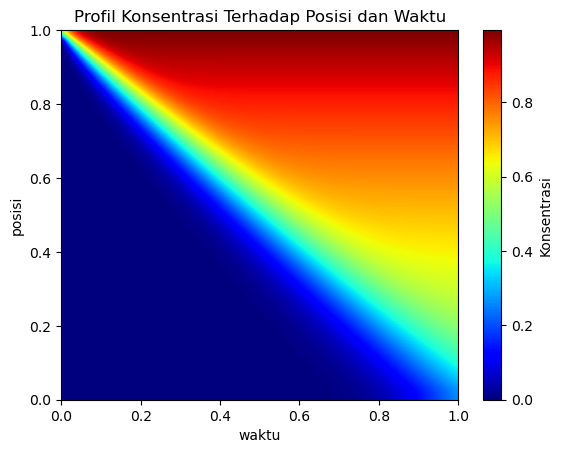

In [1]:
import numpy as np
import matplotlib.pyplot as pt
from scipy.integrate import solve_ivp as sol

#data
Co = 0
Pe = 100
Da = 2
v = 2
Nx,Nt = 55,101
xf = 1
x = np.linspace(0,xf, Nx)
tf = 1
t = np.linspace(0,tf,Nt)
dx = x[1]-x[0]
tbound = [t[0],t[-1]]
IC = np.ones(Nx)*Co

def fun(t,C):
    dC = np.zeros(Nx)
    #BC1
    C[0] = (-C[2]+4*C[1]+2*dx*Pe)/(2*dx*Pe+3)
    #BC2
    C[-1] = (4*C[-2]-C[-3])/3
    for i in range(1, Nx-1):
        satu = 1/Pe/dx**2*(C[i+1]-2*C[i]+C[i-1])
        dua = (C[i+1]-C[i-1])/(2*dx)
        tiga = Da*C[i]/(C[i]+v)
        dC[i] = satu-dua-tiga 
    return dC

#solver
C = sol(fun,tbound,IC, t_eval=t).y.T
#Recalculation
C[:,0] = (-C[:,2]+4*C[:,1]+2*dx*Pe)/(2*dx*Pe+3)
C[:,-1] = (4*C[:,-2]-C[:,-3])/3

#Plotting
pt.imshow(C.T,cmap='jet',extent=[0,tf,0,xf],aspect='auto',interpolation='bicubic')
pt.title('Profil Konsentrasi Terhadap Posisi dan Waktu')
pt.xlabel('waktu')
pt.ylabel('posisi')
pt.colorbar(label='Konsentrasi')